In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import timedelta
%matplotlib inline 

In [484]:
events = pd.read_csv('events_2018-07-03-02.05.42.csv')[['timestamp','event']]
rec = pd.read_csv('recording_2018-07-03-06.05.14.csv')[['timestamps','Right AUX']]
events['timestamp'] = pd.to_datetime(events['timestamp'],unit='s')
rec['timestamps'] = pd.to_datetime(rec['timestamps'],unit='s')

In [485]:
events

,timestamp,event
0,2018-07-03 06:04:44.777309000,start
1,2018-07-03 06:05:17.131401999,low
2,2018-07-03 06:05:19.631785000,high
3,2018-07-03 06:05:22.132146000,low
4,2018-07-03 06:05:24.633006000,high
5,2018-07-03 06:05:27.133359000,low
6,2018-07-03 06:05:29.634220000,high
7,2018-07-03 06:05:32.134555000,low
8,2018-07-03 06:05:34.635401000,high
9,2018-07-03 06:05:37.136249000,low


In [486]:
events['timestamp'][2] - events['timestamp'][1]

Timedelta('0 days 00:00:02.500383')

Increments of 2500ms

In [487]:
# Go to last time and add a little buffer.
firstStamp =  rec.iloc[0]['timestamps']
firstStamp

Timestamp('2018-07-03 06:05:20.381000')

In [488]:
lastStamp = events.iloc[-1]['timestamp'] + timedelta(milliseconds=4000)
lastStamp

Timestamp('2018-07-03 06:05:43.638096')

In [489]:
events = events[(events['timestamp'] >= firstStamp) & (events['timestamp'] <= lastStamp)]
rec = rec[(rec['timestamps'] >= firstStamp) & (rec['timestamps'] <= lastStamp)]

In [490]:
events

,timestamp,event
3,2018-07-03 06:05:22.132146,low
4,2018-07-03 06:05:24.633006,high
5,2018-07-03 06:05:27.133359,low
6,2018-07-03 06:05:29.634220,high
7,2018-07-03 06:05:32.134555,low
8,2018-07-03 06:05:34.635401,high
9,2018-07-03 06:05:37.136249,low
10,2018-07-03 06:05:39.638096,high


### Note:
* Low = low voltage (no sound), results in noise
* High = high voltage (loud sound), results in normal looking EEG signal. 

In [491]:
rec.head()

,timestamps,Right AUX
0,2018-07-03 06:05:20.381,-619.629
1,2018-07-03 06:05:20.385,-45.898
2,2018-07-03 06:05:20.389,722.656
3,2018-07-03 06:05:20.393,316.406
4,2018-07-03 06:05:20.396,-293.945


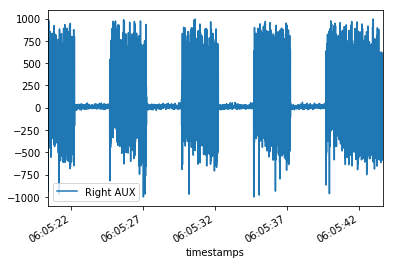

In [492]:
rec.plot(x='timestamps', y='Right AUX')

Note: high difference between holding line voltage low and high.
In the following analysis we will be looking for the transition between high voltage (low / normal EEG value) to low voltage (noisy, giant EEG values).

In [493]:
bufferedStartTime = events['timestamp'][3] + timedelta(milliseconds=175)
eventActualEndTime = events['timestamp'][4]
bufferedEndTime = events['timestamp'][4] + timedelta(milliseconds=175)

In [494]:
# Get the events from a little after the state change until the actual end time. These are our sample that we know should
# represent either voltage high or low. 
samples = rec[(rec['timestamps'] >= bufferedStartTime) & (rec['timestamps'] <= eventActualEndTime)]
samples

,timestamps,Right AUX
494,2018-07-03 06:05:22.310,20.020
495,2018-07-03 06:05:22.314,19.043
496,2018-07-03 06:05:22.318,5.859
497,2018-07-03 06:05:22.322,28.809
498,2018-07-03 06:05:22.326,35.156
499,2018-07-03 06:05:22.330,12.695
500,2018-07-03 06:05:22.334,7.324
501,2018-07-03 06:05:22.338,12.695
502,2018-07-03 06:05:22.342,18.066
503,2018-07-03 06:05:22.345,-0.977


In [495]:
mean = samples['Right AUX'].mean()
std = samples['Right AUX'].std()
mean, std

(12.426968067226884, 11.346244094167599)

In [496]:
# Get the samples from between the actual event end time and a little after - this is where we will find our actual transition event.
endValues = rec[(rec['timestamps'] > eventActualEndTime) & (rec['timestamps'] <= bufferedEndTime)]
endValues

,timestamps,Right AUX
1089,2018-07-03 06:05:24.634,20.508
1090,2018-07-03 06:05:24.638,9.277
1091,2018-07-03 06:05:24.642,5.371
1092,2018-07-03 06:05:24.646,24.414
1093,2018-07-03 06:05:24.650,6.836
1094,2018-07-03 06:05:24.654,6.836
1095,2018-07-03 06:05:24.658,18.555
1096,2018-07-03 06:05:24.662,4.395
1097,2018-07-03 06:05:24.666,18.066
1098,2018-07-03 06:05:24.669,37.598


In [497]:
outliers = endValues[(np.abs(endValues['Right AUX'] - mean) > (3 * np.abs(std)))]
outliers

,timestamps,Right AUX
1101,2018-07-03 06:05:24.681,55.664
1103,2018-07-03 06:05:24.689,-764.160
1104,2018-07-03 06:05:24.693,-818.848
1105,2018-07-03 06:05:24.697,-513.672
1106,2018-07-03 06:05:24.701,-750.000
1107,2018-07-03 06:05:24.705,-621.094
1108,2018-07-03 06:05:24.708,-47.363
1109,2018-07-03 06:05:24.712,91.797
1110,2018-07-03 06:05:24.716,114.258
1111,2018-07-03 06:05:24.720,89.355


In [498]:
firstOutlier = outliers.iloc[0]
firstOutlier

timestamps    2018-07-03 06:05:24.681000
Right AUX                         55.664
Name: 1101, dtype: object

In [499]:
firstOutlier['timestamps'] - eventActualEndTime

Timedelta('0 days 00:00:00.047994')